In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [18]:
data = pd.read_excel("ie_data_with_TRCAPE.xls")

In [19]:
data = data.set_index("Date")

In [20]:
print(data.columns)

Index(['S&P Comp.P', 'Dividend', 'Earnings', '  Consumer Price Index',
       'Date  Fraction', 'Long Interest', 'Real Price', 'Real Dividend',
       'Real Total Retutn Price', 'Real Earnings', 'Real TR Scaled Earnings',
       'Cyclically Adjusted PriceEarnings Ratio P/E10 or CAPE ',
       'Cyclically Adjusted Total Retuen PriceEarnings Ratio P/E10 or CAPE ',
       'Unnamed: 14'],
      dtype='object')


In [21]:
reg_data = data[['Real Total Retutn Price', 'Cyclically Adjusted PriceEarnings Ratio P/E10 or CAPE ']]
reg_data = reg_data.dropna()

In [22]:
y = reg_data["Cyclically Adjusted PriceEarnings Ratio P/E10 or CAPE "]
X = reg_data["Real Total Retutn Price"].values.reshape(-1, 1)

In [23]:
#split data into traingin and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#FIT 
model = LinearRegression().fit(X_train, y_train)

In [25]:
print("R^2 on the test set:", model.score(X_test, y_test))

R^2 on the test set: 0.3852373277680191


In [26]:
y_pred_test = model.predict(X_test)
test_data = pd.DataFrame({'y_test':y_test, "y_pred_test": y_pred_test}, index=reg_data.index[- len(y_test):])

In [27]:
test_data["returns"] = test_data["y_test"].pct_change()
test_data["strategy_returns"] = np.where(test_data["y_pred_test"]
< test_data["y_pred_test"].mean(), test_data["returns"], -test_data["returns"])
annualized_return = np.mean(test_data["strategy_returns"])* 252
annualized_volatility = np.std(test_data["strategy_returns"]) * np.sqrt(252)
print("Annualized return:", annualized_return)
print("Annualized volatility:", annualized_volatility)

Annualized return: 0.3018517593230611
Annualized volatility: 0.6775873196457566


In [28]:
mean_cape = y.mean()

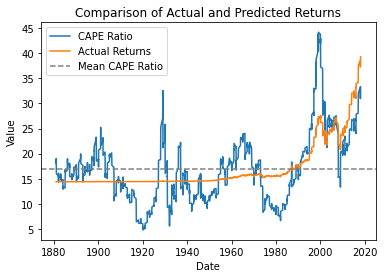

Annualized return: 0.3018517593230611
Annualized volatility: 0.6775873196457566
R-squared on the test set: 0.3852373277680191


In [29]:
plt.plot(reg_data.index, y, label="CAPE Ratio")
plt.plot(reg_data.index, model.predict(X), label="Actual Returns")
plt.axhline(mean_cape, linestyle="--", color="gray", label="Mean CAPE Ratio")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Comparison of Actual and Predicted Returns")
plt.legend()
plt.show()
print("Annualized return:", annualized_return)
print("Annualized volatility:", annualized_volatility)
print("R-squared on the test set:", model.score(X_test, y_test))